In [1]:
import pandas as pd

peptide_df = pd.read_table('data/PXD034772/DDA/2287/02287-01/result/pFind-Filtered.spectra')
peptide_df

,File_Name,Scan_No,Exp.MH+,Charge,Q-value,Sequence,Calc.MH+,Mass_Shift(Exp.-Calc.),Raw_Score,Final_Score,Modification,Specificity,Proteins,Positions,Label,Target/Decoy,Miss.Clv.Sites,Avg.Frag.Mass.Shift,Others
0,20191212_COL011-00014-HLAIp_R02.28364.28364.2....,28364,1348.716307,2,0.000000,KMLEENTNILK,1348.714013,0.002294,25.018396,0.000056,"2,Oxidation[M];",1,43050|GROUP=PC|PID=ENSP00000452939.1|GENE=TMOD...,"140,A,F/167,A,F/306,A,F/",1|0|,target,1,0.000611,32
1,20191212_COL011-00014-HLAIp_R01.14669.14669.3....,14669,1328.700015,3,0.000000,ATLHAQVADMKK,1328.699033,0.000982,26.045889,0.000059,"10,Oxidation[M];",1,99803|GROUP=PC|PID=ENSP00000216181.5|GENE=MYH9...,"1359,I,K/",1|0|,target,1,-0.000268,32
2,20191212_COL011-00014-HLAIp_R01.28716.28716.2....,28716,1348.715748,2,0.000000,KMLEENTNILK,1348.714013,0.001735,25.132436,0.000097,"2,Oxidation[M];",1,43050|GROUP=PC|PID=ENSP00000452939.1|GENE=TMOD...,"140,A,F/167,A,F/306,A,F/",1|0|,target,1,0.001072,32
3,20191212_COL011-00014-HLAIp_R02.13920.13920.3....,13920,1474.839500,3,0.000000,KVFHSGTAAKSITK,1474.837567,0.001933,23.011298,0.000110,NaN,3,34681|GROUP=PC|PID=ENSP00000418615.1|GENE=GIMA...,"67,R,K/53,R,K/67,R,K/",1|,target,2,0.000161,0
4,20191212_COL011-00014-HLAIp_R02.8541.8541.3.0.dta,8541,1204.675782,3,0.000000,KTAMAAAKAPTK,1204.671760,0.004022,24.013552,0.000116,"4,Oxidation[M];",3,36194|GROUP=PC|PID=ENSP00000377640.3|GENE=RPL2...,"123,K,A/",1|0|,target,2,-0.000663,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45972,20191212_COL011-00014-HLAIp_R02.27306.27306.3....,27306,1052.720605,3,0.029993,KLALLKAPAK,1052.718972,0.001633,6.021491,0.501432,NaN,3,7811|GROUP=PC|PID=ENSP00000468676.1|GENE=C19or...,"32,K,K/56,K,K/75,K,K/75,K,K/",1|,target,2,-0.000084,4
45973,20191212_COL011-00014-HLAIp_R02.10369.10369.3....,10369,1080.642535,3,0.029993,RPPKSSRPR,1080.638430,0.004105,7.699208,0.501635,NaN,1,80135|GROUP=PC|PID=ENSP00000337473.3|GENE=ZNF3...,"166,L,E/166,L,E/",1|,target,3,0.001704,68
45974,20191212_COL011-00014-HLAIp_R02.14720.14720.2....,14720,1037.538270,2,0.029993,GTYRDANIK,1037.537385,0.000885,5.432880,0.501668,NaN,1,37083|GROUP=PC|PID=ENSP00000440991.1|GENE=QKI|...,"146,N,S/146,N,S/34,N,S/97,N,S/201,N,S/201,N,S/...",1|,target,1,0.001549,4
45975,20191212_COL011-00014-HLAIp_R02.53504.53504.2....,53504,1092.558065,2,0.029993,FLAEDALNTV,1092.557117,0.000948,5.879786,0.501715,NaN,3,89338|GROUP=PC|PID=ENSP00000405998.2|GENE=DDR1...,"757,R,-/866,R,-/866,R,-/866,R,-/866,R,-/866,R,...",1|,target,0,0.001736,8


In [2]:
import pandas as pd
import numpy as np


peptides_list = peptide_df['Sequence'].tolist()
peptides_list = np.unique(peptides_list)
peptides_list, len(peptides_list)

(array(['AAAAAAAAAY', 'AAAAAAAAGGDAG', 'AAAAAAAAK', ..., 'YVYEYPSRY',
        'YVYFTNELK', 'YYGAFIKK'], dtype='<U15'),
 18145)

In [3]:
np.random.seed(42)
np.random.shuffle(peptides_list)


In [4]:
n_train = int(0.8*len(peptides_list))
train_list = peptides_list[:n_train]
test_list = peptides_list[n_train:]

In [5]:
import torch
import pickle
from fennet.mhc.mhc_binding_retriever import MHCBindingRetriever
from fennet.mhc.mhc_binding_model import ModelHlaEncoder, ModelSeqEncoder, embed_peptides

model_version = "v0819"
pept_encoder = ModelSeqEncoder().to("cpu")
hla_encoder = ModelHlaEncoder().to("cpu")

hla_encoder.load_state_dict(torch.load(f"model/HLA_model_{model_version}.pt", map_location="cpu"))
pept_encoder.load_state_dict(torch.load(f"model/pept_model_{model_version}.pt", map_location="cpu"))

with open(f"embeds/hla_{model_version}_embeds.pkl", "rb") as f:
    data_dict = pickle.load(f)
    hla_df = data_dict["protein_df"]
    hla_embeds = data_dict["embeds"]

In [11]:
with open("data/PXD034772/DDA/2287/02287-01/test_df.txt", "w") as f:
    for i in range(len(test_list)):
        f.write(f"{test_list[i]}\n")

In [6]:
pept_embeds = embed_peptides(pept_encoder, peptides_list, device="cpu")

In [7]:
import faiss
import numpy as np

def create_kmeans(d, ncentroids, min_points_per_centroid=10, max_points_per_centroid=1000, niter=20, verbose=True):
    """
    Creates and returns a K-means object.

    Parameters:
        d (int): Dimensionality of the vectors.
        ncentroids (int): Number of clusters to form.
        min_points_per_centroid (int): Minimum number of points per centroid. Defaults to 10.
        max_points_per_centroid (int): Maximum number of points per centroid. Defaults to 1000.
        niter (int): Maximum number of iterations for clustering. Defaults to 20.
        verbose (bool): Whether to display detailed information during processing. Defaults to True.

    Returns:
        kmeans: Initialized K-means object.
        index: returns an IndexFlatL2 index object.
    """
    # Create an L2 distance metric index
    index = faiss.IndexFlatL2(d)
    
    # Initialize the K-means object
    kmeans = faiss.Clustering(d, ncentroids)
    kmeans.niter = niter
    kmeans.verbose = verbose
    kmeans.min_points_per_centroid = min_points_per_centroid
    kmeans.max_points_per_centroid = max_points_per_centroid

    return kmeans, index


2025-02-24 14:27:22> Loading faiss with AVX2 support.
2025-02-24 14:27:22> Could not load library with AVX2 support due to:
ModuleNotFoundError("No module named 'faiss.swigfaiss_avx2'")
2025-02-24 14:27:22> Loading faiss.
2025-02-24 14:27:22> Successfully loaded faiss.


In [8]:
ncentroids = 10
niter = 20
verbose = True
d = pept_embeds.shape[1]

kmeans, index = create_kmeans(d, ncentroids, niter=niter, verbose=verbose)
kmeans.train(pept_embeds, index)

centroids = faiss.vector_float_to_array(kmeans.centroids).reshape(ncentroids, d)

trained_index = faiss.IndexFlatL2(d)
trained_index.add(centroids)

D, I = trained_index.search(pept_embeds, 1)

Sampling a subset of 10000 / 18145 for training
Clustering 10000 points in 480D to 10 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.01 s
  Iteration 19 (0.17 s, search 0.15 s): objective=265.145 imbalance=1.479 nsplit=0       


In [9]:
cluster_labels = I.flatten()
cluster_dists = D.flatten()

cluster_df = pd.DataFrame({
    'sequence': peptides_list,
    'cluster_label': cluster_labels,
    'cluster_dist': cluster_dists
})
cluster_df.to_csv('data/PXD034772/DDA/2287/02287-01/cluster_df.csv', index=False)

2025-02-24 14:27:22> init
2025-02-24 14:27:24> Failed to extract font properties from /usr/share/fonts/truetype/noto/NotoColorEmoji.ttf: In FT2Font: Could not set the fontsize (invalid pixel size; error code 0x17)
allele=0, kmer=8, n=39
allele=0, kmer=9, n=1379
allele=0, kmer=10, n=861
allele=0, kmer=11, n=365


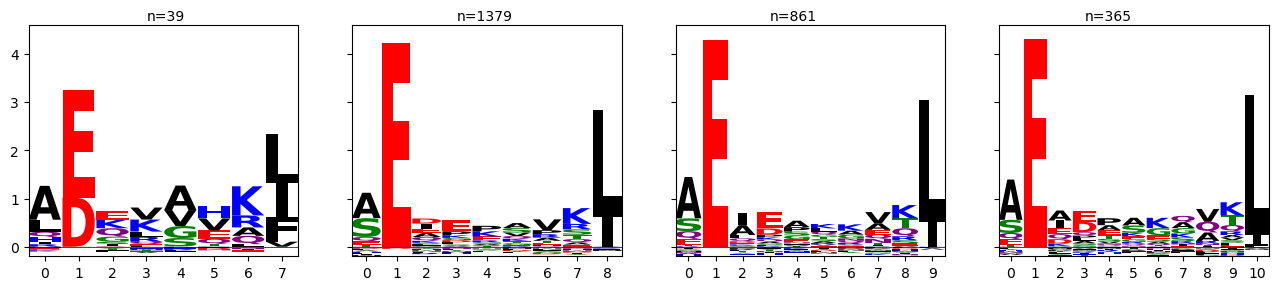

allele=1, kmer=8, n=30
allele=1, kmer=9, n=690
allele=1, kmer=10, n=213
allele=1, kmer=11, n=55


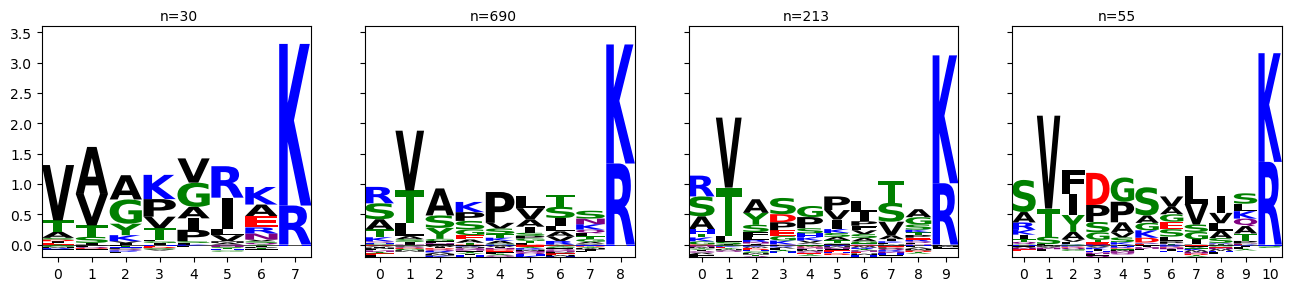

allele=2, kmer=8, n=111
allele=2, kmer=9, n=2620
allele=2, kmer=10, n=1175
allele=2, kmer=11, n=459


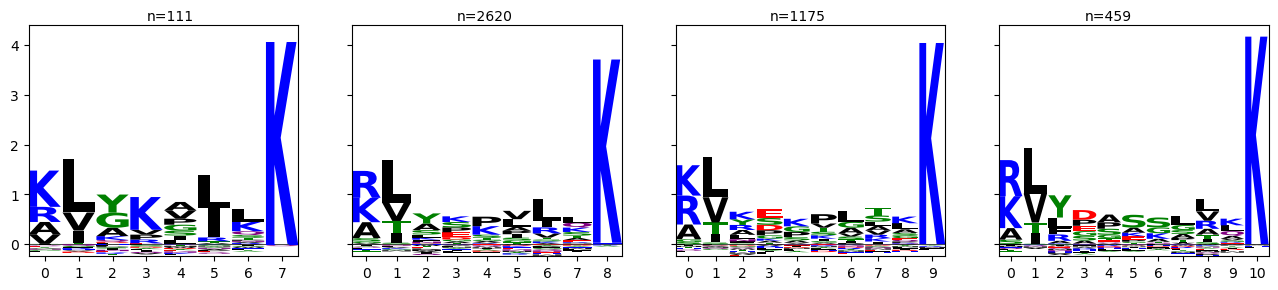

allele=3, kmer=8, n=57
allele=3, kmer=9, n=1379
allele=3, kmer=10, n=244
allele=3, kmer=11, n=121


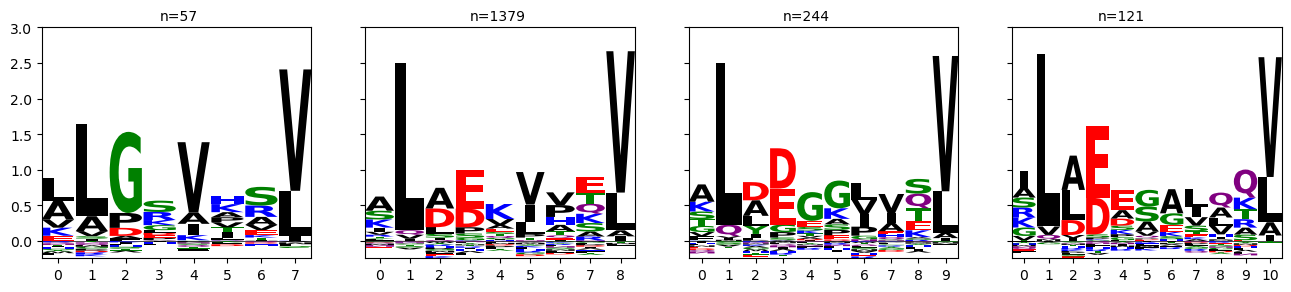

allele=4, kmer=8, n=21
allele=4, kmer=9, n=22
allele=4, kmer=10, n=14
allele=4, kmer=11, n=5


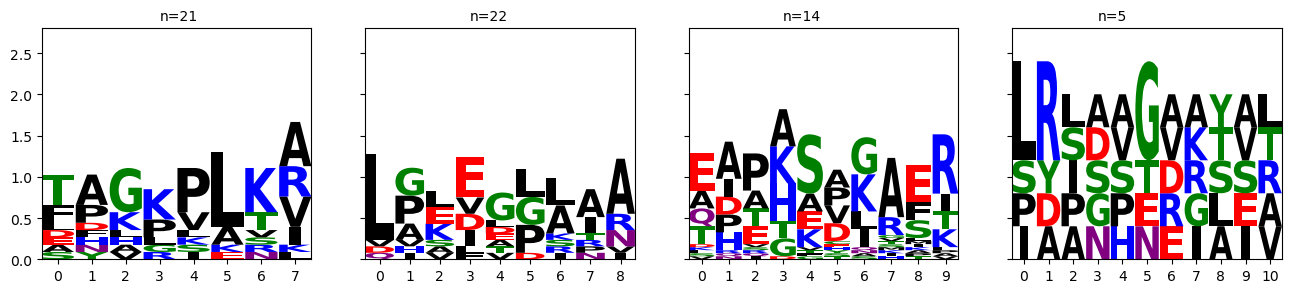

allele=5, kmer=8, n=3
allele=5, kmer=9, n=412
allele=5, kmer=10, n=63
allele=5, kmer=11, n=6


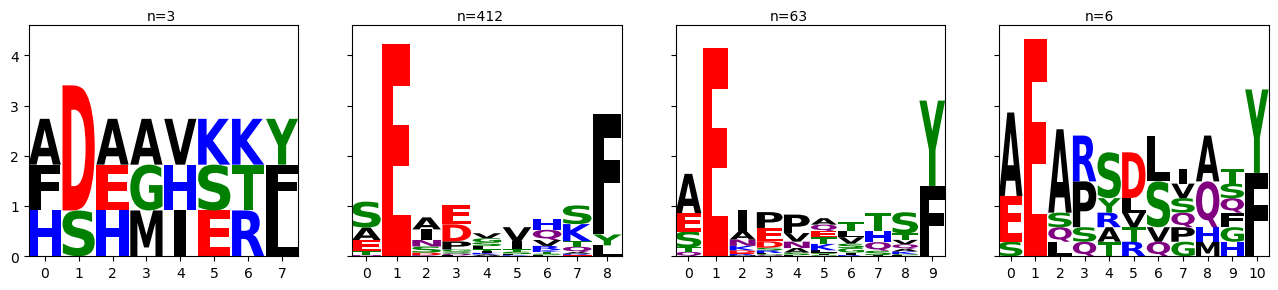

allele=6, kmer=8, n=330
allele=6, kmer=9, n=134
allele=6, kmer=10, n=140
allele=6, kmer=11, n=87


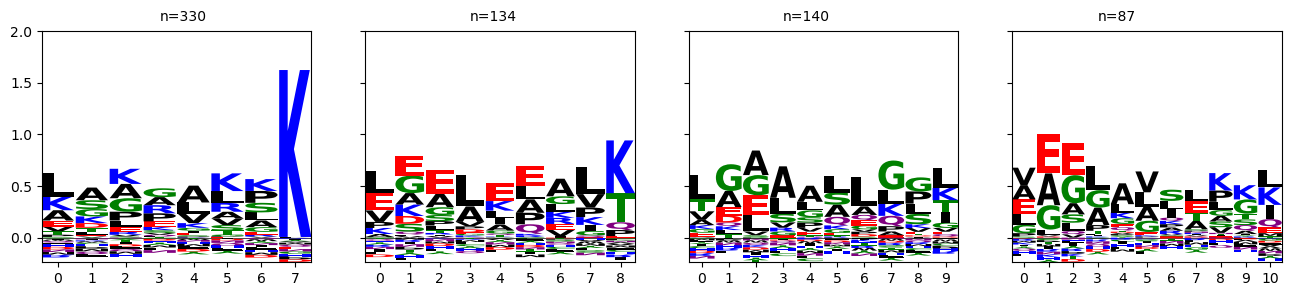

allele=7, kmer=8, n=106
allele=7, kmer=9, n=901
allele=7, kmer=10, n=74
allele=7, kmer=11, n=35


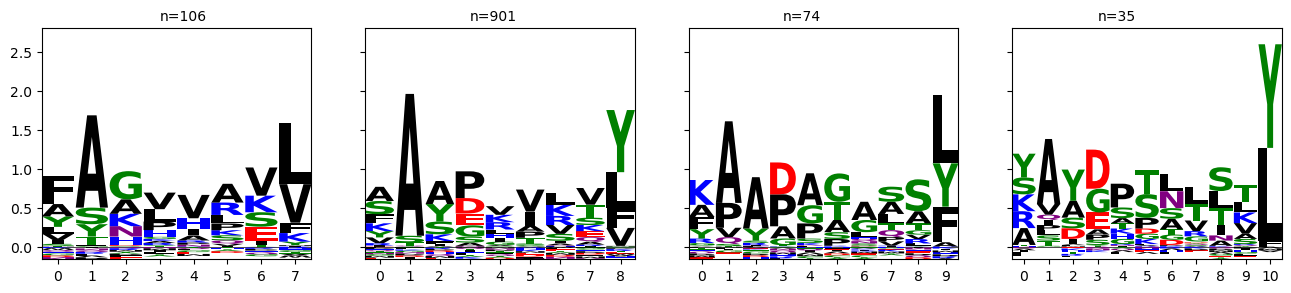

allele=8, kmer=8, n=67
allele=8, kmer=9, n=1753
allele=8, kmer=10, n=552
allele=8, kmer=11, n=327


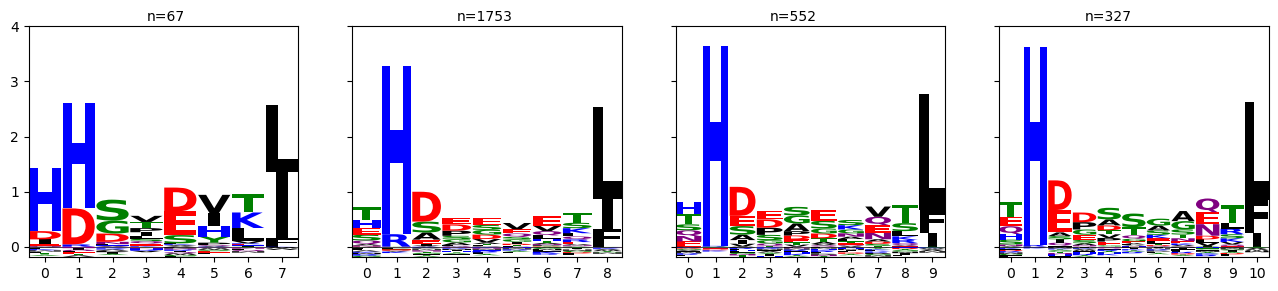

allele=9, kmer=8, n=20
allele=9, kmer=9, n=1069
allele=9, kmer=10, n=898
allele=9, kmer=11, n=459


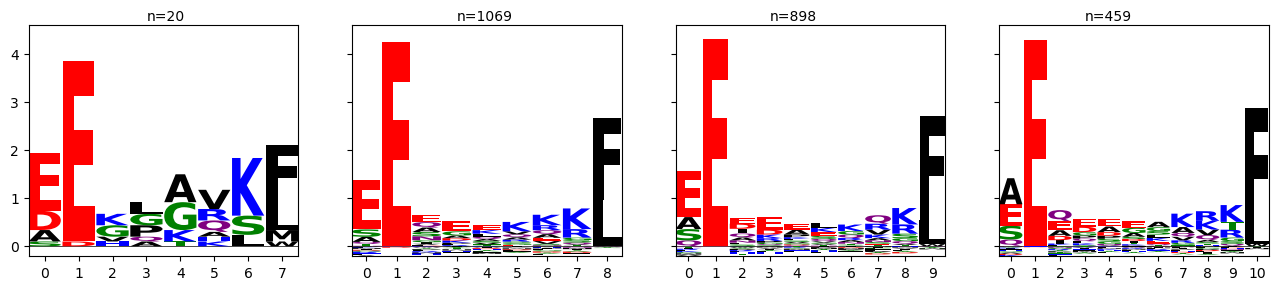

In [10]:
import matplotlib.pyplot as plt
from fennet.mhc.plotting_utils import plot_motif_multi_mer
import pandas as pd
import matplotlib

matplotlib.rcParams["axes.grid"] = False

ncentroids = 10
for i in range(ncentroids):

    kmers = [8,9,10,11]

    plot_motif_multi_mer(cluster_df.copy(), allele_col="cluster_label", allele=i, kmers=kmers, fig_width_per_kmer=4)

    plt.show()